In [4]:
# Approximate f(x)=x^3 with the forward difference approximation 
# at x = 1 for h = 0.1, 0.01, and 0.001
# We know the derivatie is 3x^2; how does the error vary with h?
def f(x):
    return x**3
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

x = 1
error1 = forward_diff(f, x, 0.1) - 3
error2 = forward_diff(f, x, 0.01) - 3
error3 = forward_diff(f, x, 0.001) - 3
print("error1 =", error1)
print("error2 =", error2)
print("error3 =", error3)

error1 = 0.31000000000000405
error2 = 0.03010000000001334
error3 = 0.0030009999997275827


In [2]:
# Use f(x)=x^3 with the central difference approximation to calculate
# the error at x = 1 for h = 0.1, 0.01, and 0.001
# How does the error depend on h?
def f(x):
    return x**3
def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 1
error1 = central_diff(f, x, 0.1) - 3
error2 = central_diff(f, x, 0.01) - 3
error3 = central_diff(f, x, 0.001) - 3
print("error1 =", error1)
print("error2 =", error2)
print("error3 =", error3)
decrease_factor1 = round(error1 / error2)
decrease_factor2 = round(error2 / error3)
print("Error decrease factors:", decrease_factor1, decrease_factor2)
# The error decreases quadratically as a function of h.

error1 = 0.010000000000001563
error2 = 0.0001000000000055401
error3 = 9.999998633603013e-07
Error decrease factors: 100 100


In [4]:
# Now try f(x) = x^2 at x=1 with both the forward and central difference
# approximations; what happens to the error for the latter?
def f(x):
    return x**2
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h
def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 1
ferror1 = forward_diff(f, x, 0.1) - 2
ferror2 = forward_diff(f, x, 0.01) - 2
ferror3 = forward_diff(f, x, 0.001) - 2
decrease_factor1 = round(ferror1 / ferror2)
decrease_factor2 = round(ferror2 / ferror3)
print("Fwd diff error decrease factors:", decrease_factor1, decrease_factor2)

cerror1 = central_diff(f, x, 0.1) - 2
cerror2 = central_diff(f, x, 0.01) - 2
cerror3 = central_diff(f, x, 0.001) - 2
print("Central diff error1 =", cerror1)
print("Central diff error2 =", cerror2)
print("Central diff error3 =", cerror3)

# The central difference errors are all essentially zero.

Fwd diff error decrease factors: 10 10
Central diff error1 = 4.440892098500626e-16
Central diff error2 = 1.7763568394002505e-15
Central diff error3 = -1.6475709685437323e-13


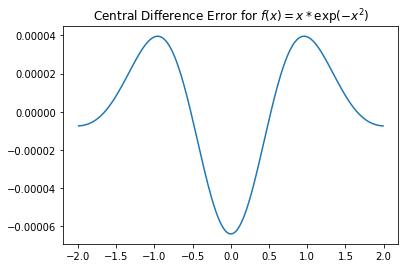

In [4]:
# Generate a vector x of 101 equally spaced points between -2 and 2.
# Let f(x) = x * exp(-x^2) in a vector y.
# Create a vector z which approximates f’(x) at all but the end points
# using central differencing.
# Plot the difference between the actual derivative and this approximation.
# Repeat using 501 equally spaced points between -2 and 2.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def central_diffs(y, h):
    #z = np.array( [y[i + 2] - y[i] for i in range(y.shape[0] - 2)] )
    z = y[2:] - y[:-2]
    return z / (2 * h)

num_points = 501   # Try 101 and 501
x = np.linspace(-2, 2, num_points)
y = x * np.exp(-x**2)
h = 4 / (num_points - 1)
z_approx = central_diffs(y, h)
x2 = x[1:-1]   # Exclude both endpoints
z_exact = np.exp(-x2**2) * (1 - 2*x2**2)
plt.plot(x2, z_approx - z_exact);
plt.title(r'Central Difference Error for $f(x) = x * \exp(-x^2)$');

In [8]:
# For f(x) = x^3, apply this approximation for a second derivative:
# f(x-h) - 2f(x) + f(x+h) / h^2
# and compare the result to the actual second derivative.
def f(x):
    return x**3
def second_deriv_approx(f, x, h):
    return (f(x - h) - 2 * f(x) + f(x + h)) / (h * h)

x = 1
sderror1 = second_deriv_approx(f, x, 0.1) - 6
sderror2 = second_deriv_approx(f, x, 0.01) - 6
sderror3 = second_deriv_approx(f, x, 0.001) - 6
print("error1 =", sderror1)
print("error2 =", sderror2)
print("error3 =", sderror3)

# The central difference errors are all essentially zero.

error1 = 4.884981308350689e-14
error2 = 1.55964130499342e-12
error3 = -2.715552227527951e-10


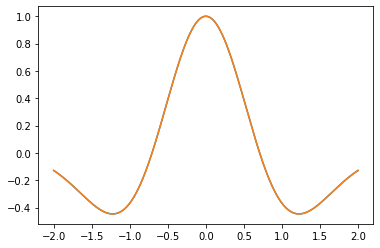

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags 
# diags helps construct a sparse matrix by providing the diagonal values
# read more about it on Scipy ref pages as we will use it later in the course
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html

# creating the function f(x) = xe^(-x^2)
def f(x):
    return x*np.exp(-x**2)

# creating the function f'(x) = (1-2x^2)e^(-x^2)
def fp(x):
    return (1-2*x**2)*np.exp(-x**2) 

def gen_matrix(N):
    # create matrix diagonals
    d0 = np.zeros(N+1); d0[0] = -3.; d0[-1] = 3.
    d1 = np.ones(N); d1[0] = 4.
    dm1 = -np.ones(N); dm1[-1] = -4.
    d2 = np.zeros(N-1); d2[0] = -1.
    dm2 = np.zeros(N-1); dm2[-1] = 1.
    return diags([dm2,dm1,d0,d1,d2],[-2,-1,0,1,2], shape=(N+1,N+1), dtype=float)

N = 400; a = -2; b = 2
x = np.linspace(a,b,N+1)
y = f(x)
h = (b-a)/N
A = gen_matrix(N)
fp_estd = A @ y / (2.*h)
fp_actual = fp(x)
plt.plot(x,fp_estd,x,fp_actual);